# Spherical Harmonics HRTF interpolation
*Fabian Brinkmann*<br>  
*Audio Communication Group, Technische Universität Berlin*<br>  
*Contact: fabian.brinkmann@tu-berlin.de*

HRTF interpolation is important to obtain HRTF for any desired source position. In this simple example we will interpolate HRTFs using Spherical Harmonics (SH), which is a global interpolation approach. This makes it easy to interpolate to arbitrary source positions.

**Duration:** 45-60 Minutes

**Requirements:** Basic knowledge of spatial hearing, HRTFs, spherical harmonics, matrix operations, coordinate conventions, and SOFA files

**References**<br>  
[1] B. Rafaely, Fundamentals of spherical array processing, 2nd ed. Berlin, Heidelberg, Germany: Springer, 2019. doi: [10.1007/978-3-319-99561-8](https://doi.org/10.1007/978-3-319-99561-8).

[2] T. Deppisch and J. Ahrens, “Symmetries in Complex-Valued Spherical Harmonic Processing of Real-Valued Signals,” in DAS|DAGA - 51st Annual Meeting on Acoustics, Copenhagen, Denmark, Mar. 2025, pp. 225–228. doi: [10.71568/dasdaga2025.039](https://doi.org/10.71568/dasdaga2025.039).


**Dependencies**<br>  
`pip install pyfar>=0.7 pooch nbgrader ipykernel watermark`

In [ ]:
import pyfar as pf
import numpy as np
from scipy.special import sph_harm_y
import matplotlib.pyplot as plt
import pooch
from IPython.display import Audio, display
%matplotlib inline

Start by downloading the file FABIAN_HRIR_measured_HATO_0.sofa by executing the cell below.

In [ ]:
# adjust this path to your needs. Using `None` will download the file to your
# system cache.
path = None

# Leave this as it is: This is the URL from which the data will be downloaded
# and a hash for checking if the download worked.
url = 'https://github.com/pyfar/files/raw/refs/heads/main/education/VAR_TUB/FABIAN_HRIR_measured_HATO_0.sofa?download='
hash = '83ebbcd9a09d17679b95d201c9775438c0bb1199d565c3fc7a25448a905cdc3c'

file = pooch.retrieve(
    url, hash, fname='FABIAN_HRIR_measured_HATO_0.sofa', path=path)

### 1. Load HRTFs

Load the HRTFs as a pyfar Signal and the source positions as a pyfar Coordinates object.

The more source positions are contained in an HRTF data set, the better the SH interpolation will work. In this example, we will use the FABIAN HRTFs, which can be used up to a SH order of approximately $N=32$.

In [ ]:
# load HRIRs and source positions
# HINT: The path of the SOFA file containing is given by `file` (see above)
# YOUR CODE HERE
raise NotImplementedError()

### 2. Generate Spherical Harmonics Matrix

We will use the discrete SH transform, which requires us to generate a matrix $\mathbf{Y}$ that contains all required basis functions $Y_n^m$ of order $n$ and degree $m$.

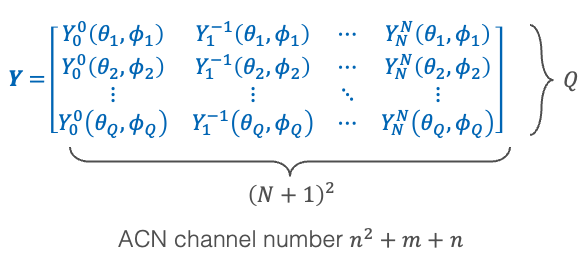

As you can see, it is of shape $Q$ (number of source positions) $\times$ $(N+1)^2$ (number of SH basis functions), with $N$ being the maximum SH order. The basis functions themselves depend on the colatitude $\theta$ and the azimuth $\phi$.

Start with defining the maximum SH order $n_\text{max}\geq0$ and number of source positions.

In [ ]:
# define maximum SH order
# YOUR CODE HERE
raise NotImplementedError()
# get number of source positions from Coordinates object

# YOUR CODE HERE
raise NotImplementedError()

Next, generate vectors $n$ and $m$ containing the SH order $n$ ($n\geq0$) and degree $m$ ($|m|\leq n$).

| channel index |   0 |  1 |  2 |  3 |  4 | ... |
|:-------------:|:---:|:--:|:--:|:--:|:--:|:---:|
|      n        |   0 |  1 |  1 |  1 |  2 | ... |
|      m        |   0 | -1 |  0 |  1 | -2 | ... |

The channel index is given by $n^2 + n + m$.

In [ ]:
n = np.zeros((1, (n_max + 1)**2), dtype=int)
m = np.zeros((1, (n_max + 1)**2), dtype=int)
# YOUR CODE HERE
raise NotImplementedError()

Now, generate the SH matrix $\mathrm{Y}$ using `scipy.special.sph_harm_y`.

In [ ]:
# HINT: you have to pass 2D arrays to `sph_harm_y`
#       to get the Y with the correct shape
# YOUR CODE HERE
raise NotImplementedError()

# check the shape
# YOUR CODE HERE
raise NotImplementedError()

Note: For simplicity, this assignment uses the complex-valued spherical harmonics from `scipy.special_sph_harm_y`. In digital audio signal processing, the real valued SHs are often preferred, especially for Ambisonics. See reference [2] for symmetry properties of complex-valued SHs that can be exploited.

### 3. Perform the Spherical Harmonics Transform

In this example, we will perform the discrete SH transform using the pseudo inverse of **Y**, which is given by

$$\mathrm{f}_{nm} = \mathbf{Y}^\dagger \mathbf{h}$$

where $\mathbf{h}$ is a vector of shape $Q \times 1$ that contains the complex HRTF spectra for all source positions and a single frequency. The result is the SH spectrum $f_{nm}$ of shape $(N+1)^2 \times 1$.

Note that the spectra $f_{nm}$ can be computed for both ears and all frequencies using a single call of `pf.matrix_multiplication`.

In [ ]:
# invert Y matrix using Moore-Penrose pseudo inverse
# YOUR CODE HERE
raise NotImplementedError()

# compute SH coefficients (SH Transform)
# YOUR CODE HERE
raise NotImplementedError()

### 4. Interpolate using the Inverse Spherical Harmonics Transform

The interpolation can be performed using the inverse SH transform. In matrix notation, this is given by

$$\hat{\mathrm{h}} = \mathrm{Y} \mathrm{f}_{nm} . $$

Note two things:

1. If $N$ is sufficently large, the interpolation is physically correct and $\hat{\mathrm{h}} = \mathrm{h}$.
2. $\mathrm{Y}$ now contains the source positions to which the HRTFs are interpolated. It can contain one or multiple source positions.

To see how well the interpolation works, interpolate to the same source positions that are contained in the FABIAN HRTF data set. This means you can use the $\mathrm{Y}$ matrix that you created above.

Again, the interpolation for all frequencies can be done with a single call of `pf.matrix_multiplication`.

In [ ]:
# Interpolate using the inverse SH transform
# YOUR CODE HERE
raise NotImplementedError()

### 5. Plot the results

A quick and effective way of checking the results is plotting – go ahead and plot:

- the HRIRs and HRTFs used for interpolation
- the interpolated and target HRIRs and HRTFs

It's easiest to do this for a single source position.

In [ ]:
# source position for plotting
find = pf.Coordinates.from_spherical_colatitude(
    90 / 180 * np.pi,  # azimuth angle
    90 / 180 * np.pi,  # colatitude angle
    1.7)               # radius
idx, _ = sources.find_nearest(find)
idx = idx[0]

# plot
# YOUR CODE HERE
raise NotImplementedError()

### 5. Listen to the results

Plots give a quick impression and are useful for a visual check and also for visual comparison across different conditions. A second check should always be to listen to the results. Go ahead and listen to the interpolated and input HRIR.

In [ ]:
content = 'castanets'
if content == 'noise':
    content = pf.signals.noise(44100, 'pink')
elif content == 'castanets':
    content = pf.signals.files.castanets(hrirs.sampling_rate)

# render the target using iPython widgets
# YOUR CODE HERE
raise NotImplementedError()

# render the interpolation result using iPython widgets
# YOUR CODE HERE
raise NotImplementedError()

### 6. Exploration

Now that you have coded all the above, it's time to play. For example, you can try to find the SH order above which you perceive the target and interpolated HRTF to be
identical. You can also try experimenting with different audio contents. Noise or noise bursts are often used to reveal subtle differences, which is helpful for developing algorithms. Speech or music are good examples of real-life signals that are more relevant for actual applications.

### 7. Challenge

Do time-aligned spherical harmonics interpolation. For this to work you have to

- Estimate the onset times of the HRIRs
- Time align the HRIRs
- Separately interpolate the HRIRs and onset times
- Delay the interpolated HRIRs using the interpolated onset times

### 8. Easy way out

In this assignment, you performed all required steps manually. This takes a little longer but is nice to understand the process in depth. Alternatively, you can use [spharpy](https://spharpy.readthedocs.io/en/stable/spharpy.html) to do the same tasks with fewer lines of code.

# License notice

This notebook is licensed under CC BY 4.0

# Watermark

The following watermark might help others to install specific package versions that might be required to run the notebook. Please give at least the versions of Python, IPython, numpy , and scipy, major third party packagers (e.g., pytorch), and all used pyfar packages.

In [ ]:
%load_ext watermark
%watermark -v -m -p numpy,scipy,pyfar,sofar,nbgrader,watermark

Python implementation: CPython
Python version       : 3.13.4
IPython version      : 9.1.0

numpy    : 2.3.0
scipy    : 1.15.3
pyfar    : 0.7.3
sofar    : 1.2.2
nbgrader : 0.9.5
watermark: 2.5.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 24.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

